In [161]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from skimage.color import rgb2gray

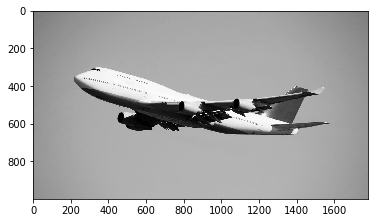

In [162]:
# Load image
im = imread('airplane.jpeg')
im_gray = rgb2gray(im)

plt.imshow(im_gray, cmap='gray')
plt.show()

In [163]:
X = im_gray
U, S, V = np.linalg.svd(X, full_matrices=False, compute_uv=True)

print(U.shape, S.shape, V.shape)

(999, 999) (999,) (999, 1778)


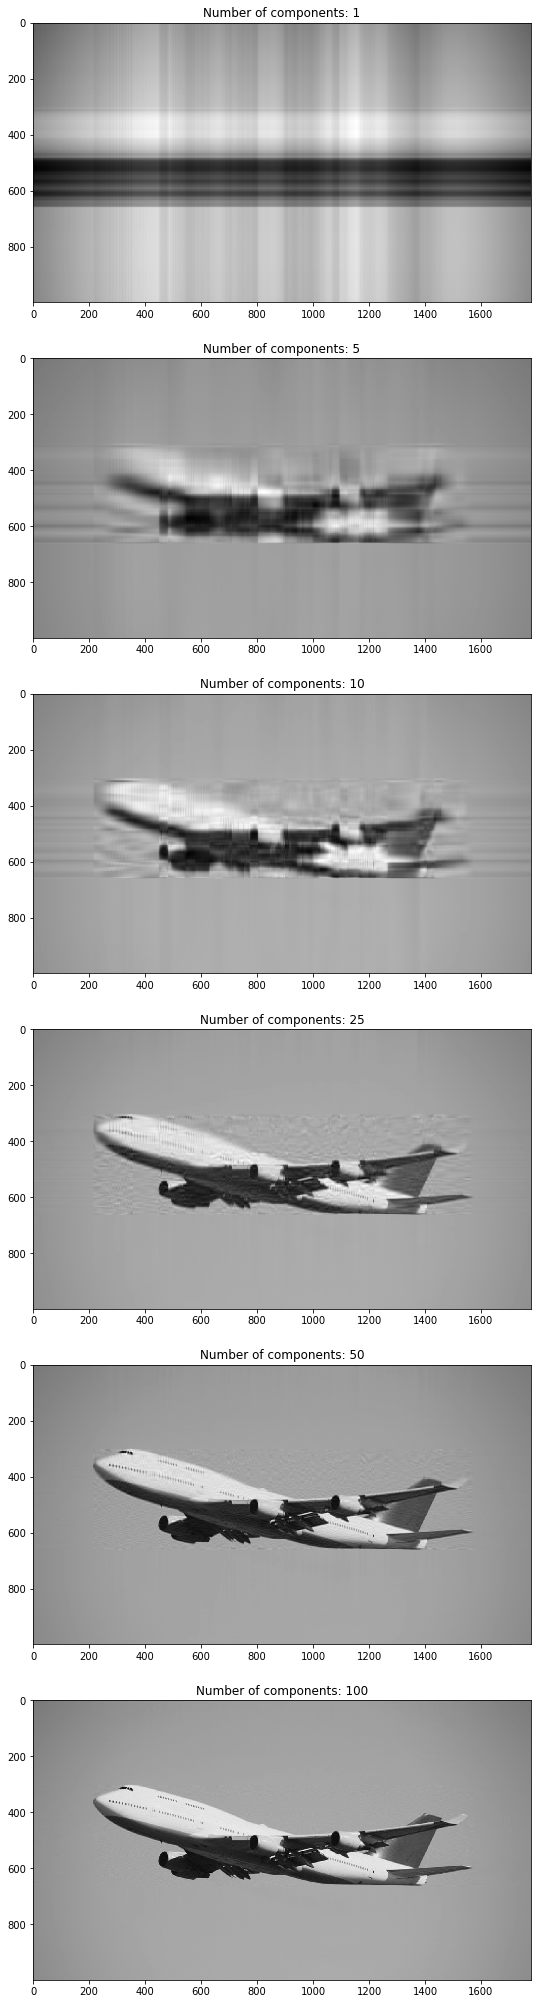

Compression rate =  0.8436006310022058


In [164]:
n_components = [1, 5, 10, 25, 50, 100]
n_im = len(n_components)

_, axs = plt.subplots(n_im, 1, figsize=(9, 6 * n_im))

for i, j in enumerate(n_components):
    u1 = U[:, :j]
    v1 = V[:j, :]    
    
    x_n = np.matmul(np.matmul(u1, np.diag(S[:j])), v1)    
    axs[i].imshow(x_n, cmap='gray')
    axs[i].set_title('Number of components: ' + str(j))
plt.show()

(n, m) = X.shape
print('Compression rate = ', 1 - ((n + m + 1) * n_components[-1]) / n / m)

$$
\mathbf{J}
=
\frac{d \mathbf{f}}{d \mathbf{x}}
=
\left[ \frac{\partial \mathbf{f}}{\partial x_1}
\cdots \frac{\partial \mathbf{f}}{\partial x_n} \right]
=
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \cdots &
\frac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \cdots &
\frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

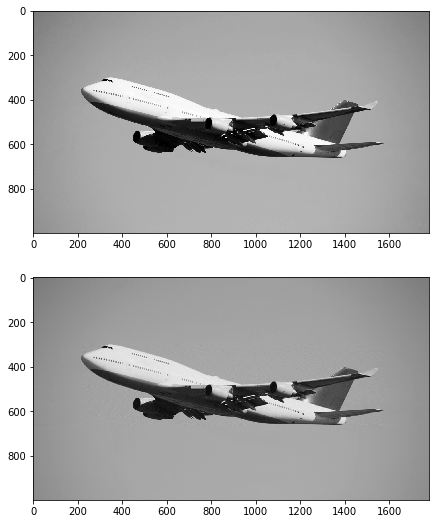

In [165]:
j = 100 # number of components

u_j = U[:, :j]
v_j = V[:j, :]
s_j = np.diag(S[:j])

x_n = np.matmul(np.matmul(u_j, s_j), v_j) # X = USV   

_, axs = plt.subplots(2,1, figsize=(9,9))
axs[0].imshow(X, cmap='gray')
axs[1].imshow(x_n, cmap='gray')
plt.show()